<a href="https://colab.research.google.com/github/ultimatecrack/machine-learning/blob/master/practice/Deep%20Learning/Self%20Organizing%20Maps/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Map

##Install MiniSom Package

In [87]:
!pip install MiniSom

### Importing the libraries


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [89]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [90]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

## Feature Scaling


In [91]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [92]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


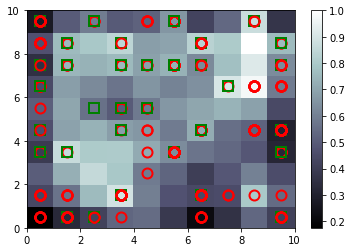

In [93]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [95]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,6)], mappings[(8,9)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [96]:
frauds

array([[1.5813718e+07, 1.0000000e+00, 4.2830000e+01, 1.2500000e+00,
        2.0000000e+00, 7.0000000e+00, 4.0000000e+00, 1.3875000e+01,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 3.5200000e+02, 1.1300000e+02],
       [1.5815271e+07, 1.0000000e+00, 2.7580000e+01, 3.2500000e+00,
        1.0000000e+00, 1.1000000e+01, 8.0000000e+00, 5.0850000e+00,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 3.6900000e+02, 2.0000000e+00],
       [1.5744273e+07, 1.0000000e+00, 2.2670000e+01, 7.5000000e-01,
        2.0000000e+00, 3.0000000e+00, 4.0000000e+00, 1.5850000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 4.0000000e+02, 1.0000000e+01],
       [1.5773934e+07, 1.0000000e+00, 3.2920000e+01, 2.5000000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 1.7500000e+00,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

##Printing the Fraunch Clients

In [97]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15813718
15815271
15744273
15773934
15694237
15805627
15692718
15789865
15757933
15677395
15810716
15767264
15573798
15593694
15647295
